In [108]:
import pandas as pd
import requests

In [110]:
r1 = requests.get(
    'https://data.cityofnewyork.us/resource/43nn-pn8j.json?cuisine_description=Pizza&$offset=0')
response1 = r1.json()
df1_main = pd.DataFrame(response1)

In [111]:
offset_ = 0
while offset_ < 20000:
    df1_a = df1_main
    offset_ += 1000
    r = requests.get('https://data.cityofnewyork.us/resource/43nn-pn8j.json?cuisine_description=Pizza&$offset=' + str(offset_))
    response = r.json() 
    df1_b = pd.DataFrame(response)
    df1_main = pd.concat([df1_a, df1_b], sort=True)
    if offset_ % 10000 == 0:
        print(offset_,' ', len(df1_main))
        

10000   11000
20000   17459


In [112]:
df1_main.camis.nunique()

1222

In [113]:
df1_a.head(3)

,action,bbl,bin,boro,building,camis,census_tract,community_board,council_district,critical_flag,...,latitude,longitude,nta,phone,record_date,score,street,violation_code,violation_description,zipcode
0,Establishment Closed by DOHMH. Violations wer...,2054160046,2100082,Bronx,3233,50082639,027402,210,13,N,...,40.846198242431,-73.81964052374,BX10,9297779555,2019-09-06T06:00:54.000,79,AMPERE AVE,10I,"Single service item reused, improperly stored,...",10465
1,Violations were cited in the following area(s).,2024790019,2002958,Bronx,76,41314872,019700,204,16,N,...,40.835250599957,-73.919932220641,BX63,7185382054,2019-09-06T06:00:54.000,28,EAST 167 STREET,10F,Non-food contact surface improperly constructe...,10452
2,Violations were cited in the following area(s).,1004107501,1005320,Manhattan,101,50072312,001800,103,01,Y,...,40.719103513002,-73.98886365769,MN27,6466785589,2019-09-06T06:00:54.000,18,LUDLOW ST,02B,Hot food item not held at or above 140º F.,10002


In [114]:
r1 = requests.get(
    'https://data.cityofnewyork.us/resource/43nn-pn8j.json?cuisine_description=Italian&$offset=0')
response1 = r1.json()
dfi_main = pd.DataFrame(response1)

offset_ = 0
while offset_ < 20000:
    dfi_a = dfi_main
    offset_ += 1000
    r = requests.get('https://data.cityofnewyork.us/resource/43nn-pn8j.json?cuisine_description=Italian&$offset=' + str(offset_))
    response = r.json() 
    dfi_b = pd.DataFrame(response)
    dfi_main = pd.concat([dfi_a, dfi_b], sort=True)
    if offset_ % 10000 == 0:
        print(offset_,' ', len(dfi_main))
        

10000   11000
20000   15718


In [115]:
df = pd.concat([dfi_main, df1_main], sort=True)

In [116]:
df.head(3)

,action,bbl,bin,boro,building,camis,census_tract,community_board,council_district,critical_flag,...,latitude,longitude,nta,phone,record_date,score,street,violation_code,violation_description,zipcode
0,Violations were cited in the following area(s).,3060370061,3153242,Brooklyn,717,50047502,014000,310,43,Y,...,40.618607531412,-74.021439368569,BK30,7188369444,2019-09-06T06:00:54.000,12,86TH ST,06F,Wiping cloths soiled or not stored in sanitizi...,11228
1,Violations were cited in the following area(s).,1012890036,1035732,Manhattan,390,41436878,010200,105,04,Y,...,40.759413063897,-73.972360616364,MN17,2128882700,2019-09-06T06:00:54.000,12,PARK AVENUE,06E,"Sanitized equipment or utensil, including in-u...",10022
2,Violations were cited in the following area(s).,3009330003,3018578,Brooklyn,59,50038979,012902,306,39,N,...,40.68100163942,-73.977336281993,BK37,3477631975,2019-09-06T06:00:54.000,9,5TH AVE,10F,Non-food contact surface improperly constructe...,11217


In [117]:
df.columns

Index(['action', 'bbl', 'bin', 'boro', 'building', 'camis', 'census_tract',
       'community_board', 'council_district', 'critical_flag',
       'cuisine_description', 'dba', 'grade', 'grade_date', 'inspection_date',
       'inspection_type', 'latitude', 'longitude', 'nta', 'phone',
       'record_date', 'score', 'street', 'violation_code',
       'violation_description', 'zipcode'],
      dtype='object')

In [118]:
df.inspection_date = pd.to_datetime(df.inspection_date, format='%Y-%m-%dT')

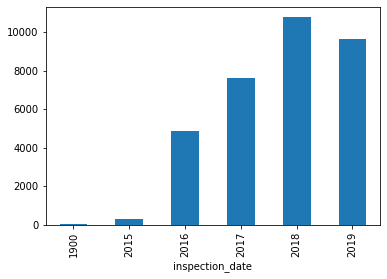

In [119]:
df.inspection_date.groupby(df.inspection_date.dt.year).count().plot(kind="bar")

In [127]:
df.groupby('camis').last()

,action,bbl,bin,boro,building,census_tract,community_board,council_district,critical_flag,cuisine_description,...,latitude,longitude,nta,phone,record_date,score,street,violation_code,violation_description,zipcode
camis,,,,,,,,,,,,,,,,,,,,,
40363945,Violations were cited in the following area(s).,1011430049,1081483,Manhattan,148,015700,107,06,N,Pizza,...,40.778073572727,-73.980401099931,MN14,2125010200,2019-09-06T06:00:54.000,11,WEST 72 STREET,20D,“Choking first aid” poster not posted. “Alcoho...,10023
40364373,Violations were cited in the following area(s).,1013950040,1041931,Manhattan,1028,011402,108,04,N,Italian,...,40.76270773611,-73.965749576014,MN40,2127581902,2019-09-06T06:00:54.000,38,3 AVENUE,08A,Facility not vermin proof. Harborage or condit...,10065
40364668,Violations were cited in the following area(s).,1009120026,1081628,Manhattan,251,007000,106,02,Y,Italian,...,40.743332794963,-73.978336291181,MN20,2126792494,2019-09-06T06:00:54.000,12,EAST 31 STREET,04L,Evidence of mice or live mice present in facil...,10016
40364920,Violations were cited in the following area(s).,4006800044,4011252,Queens,3013,014900,401,22,N,Pizza,...,40.763274590236,-73.915477826359,QN70,7187219862,2019-09-06T06:00:54.000,26,STEINWAY STREET,10F,Non-food contact surface improperly constructe...,11103
40365013,Violations were cited in the following area(s).,5032810010,5107511,Staten Island,67,007000,502,50,Y,Italian,...,40.592814177678,-74.070677121271,SI36,7184478926,2019-09-06T06:00:54.000,5,OLYMPIA BOULEVARD,06C,Food not protected from potential source of co...,10305
40365098,Violations were cited in the following area(s).,1001990007,1083367,Manhattan,93,002900,103,01,Y,Italian,...,40.717018029408,-73.999624832129,MN27,2123496779,2019-09-06T06:00:54.000,12,BAXTER STREET,06D,"Food contact surface not properly washed, rins...",10013
40365355,Violations were cited in the following area(s).,3059120009,3147565,Brooklyn,7201,013200,310,43,Y,Italian,...,40.628582862806,-74.016719596504,BK30,7188330800,2019-09-06T06:00:54.000,12,8 AVENUE,02B,Hot food item not held at or above 140º F.,11228
40365387,Violations were cited in the following area(s).,1005250064,1008279,Manhattan,106,006500,102,01,N,Italian,...,40.727234052041,-74.000515935209,MN23,2126773820,2019-09-06T06:00:54.000,9,WEST HOUSTON STREET,08C,Pesticide use not in accordance with label or ...,10012
40365577,Violations were cited in the following area(s).,1018820028,1056908,Manhattan,1024,019900,109,07,Y,Italian,...,40.803329420525,-73.963611914951,MN09,2126668051,2019-09-06T06:00:54.000,26,AMSTERDAM AVENUE,06D,"Food contact surface not properly washed, rins...",10025


In [128]:
df.groupby('inspection_date').count()

,action,bbl,bin,boro,building,camis,census_tract,community_board,council_district,critical_flag,...,latitude,longitude,nta,phone,record_date,score,street,violation_code,violation_description,zipcode
inspection_date,,,,,,,,,,,,,,,,,,,,,
1900-01-01,0,4,4,4,4,4,4,4,4,0,...,4,4,4,4,4,0,4,0,0,4
2015-08-04,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,4,5,5,5,5
2015-09-08,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
2015-09-15,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2015-09-16,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2015-09-17,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,4,5,5,5,5
2015-09-21,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2015-09-24,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
2015-09-25,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
